In [80]:
%pip install numpy pandas matplotlib

Note: you may need to restart the kernel to use updated packages.


In [81]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [7]:
n: int = 100

x = np.linspace(0, 1, n)
x

array([0.        , 0.01010101, 0.02020202, 0.03030303, 0.04040404,
       0.05050505, 0.06060606, 0.07070707, 0.08080808, 0.09090909,
       0.1010101 , 0.11111111, 0.12121212, 0.13131313, 0.14141414,
       0.15151515, 0.16161616, 0.17171717, 0.18181818, 0.19191919,
       0.2020202 , 0.21212121, 0.22222222, 0.23232323, 0.24242424,
       0.25252525, 0.26262626, 0.27272727, 0.28282828, 0.29292929,
       0.3030303 , 0.31313131, 0.32323232, 0.33333333, 0.34343434,
       0.35353535, 0.36363636, 0.37373737, 0.38383838, 0.39393939,
       0.4040404 , 0.41414141, 0.42424242, 0.43434343, 0.44444444,
       0.45454545, 0.46464646, 0.47474747, 0.48484848, 0.49494949,
       0.50505051, 0.51515152, 0.52525253, 0.53535354, 0.54545455,
       0.55555556, 0.56565657, 0.57575758, 0.58585859, 0.5959596 ,
       0.60606061, 0.61616162, 0.62626263, 0.63636364, 0.64646465,
       0.65656566, 0.66666667, 0.67676768, 0.68686869, 0.6969697 ,
       0.70707071, 0.71717172, 0.72727273, 0.73737374, 0.74747

In [8]:
def f_a(x):
    return np.sin(3.0 / 2.0 * np.pi * x)

def f_b(x):
    return np.square(x)

def make_eps(n: int = 100):
    return np.random.normal(0, 1.0, n)

In [20]:
def fit_polynomial(x, y, degree: int = 1):
    return np.polyfit(x, y, degree)

array([ 3.57196079, -5.19011945,  3.18635273, -0.34297149])

In [43]:
def calculate_bic(y: np.ndarray, y_hat: np.ndarray, k: int) -> float:
    """
    Calculate the Bayesian Information Criterion (BIC) for a model fit.

    Args:
        y: The observed values.
        y_hat: The predicted values.
        k: The number of parameters in the model.

    Returns:
        The BIC for the model.
    """

    assert y.ndim == 1, "y must be a 1D array."
    assert len(y) == len(y_hat), "y and y_hat must be the same length."

    n = len(y)
    sigma2 = np.sum((y - y_hat) ** 2) / n
    return n * np.log(sigma2) + k * np.log(n)

def calculate_aic(y: np.ndarray, y_hat: np.ndarray, k: int) -> float:
    """
    Calculate the Akaike Information Criterion (AIC) for a model fit.

    Args:
        y: The observed values.
        y_hat: The predicted values.
        k: The number of parameters in the model.

    Returns:
        The AIC for the model.
    """

    assert y.ndim == 1, "y must be a 1D array."
    assert len(y) == len(y_hat), "y and y_hat must be the same length."

    n = len(y)
    sigma2 = np.sum((y - y_hat) ** 2) / (n - k - 1)
    return 2 * k + n * np.log(sigma2)

In [102]:
def find_rank(
    x, y_true, criterion, max_degree: int = 10, n_runs: int = 10000
) -> pd.DataFrame:

    results = {
        "degree": [],
        "criterion_score": [],
        "mse": [],
    }

    for degree in range(1, max_degree + 1):

        for _ in range(n_runs):
            y_observed = y_true + make_eps()

            coefficients = fit_polynomial(x, y_observed, degree)
            y_hat = np.polyval(coefficients, x)

            # Measure this with y_true or with y_observed?
            score = criterion(y_true, y_hat, degree + 2)

            mse = np.mean((y_true - y_hat) ** 2)

            results["degree"].append(degree)
            results["criterion_score"].append(score)
            results["mse"].append(mse)

    return pd.DataFrame(results)


In [105]:
res = find_rank(x, f_a(x), calculate_bic, max_degree=10, n_runs=10000)

res

,degree,criterion_score,mse
0,1,-153.651871,0.187369
1,1,-122.518257,0.255806
2,1,-144.229483,0.205882
3,1,-151.705150,0.191053
4,1,-151.375590,0.191683
...,...,...,...
99995,10,-198.715059,0.078884
99996,10,-122.043475,0.169813
99997,10,-194.905032,0.081948
99998,10,-137.433330,0.145591


<AxesSubplot:title={'center':'mse'}, xlabel='[degree]'>

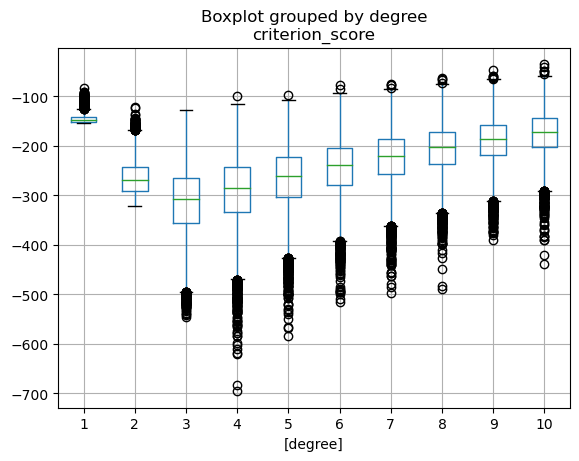

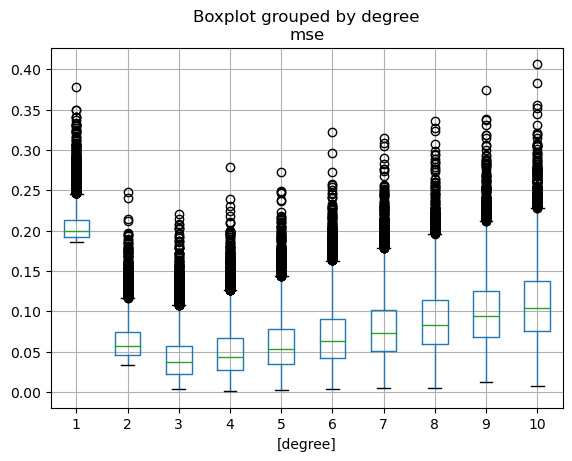

In [106]:
res[[ 'criterion_score', 'degree' ]].boxplot(by='degree')
res[[ 'mse', 'degree' ]].boxplot(by='degree')

[14.558040571981001, 13.560723030450268, 16.330817771881847, 13.747736192443384, 12.82888752148569, 12.200924773241592, 13.77581790542198, 14.19875589757473, 12.456432634643493, 12.155311421195682]


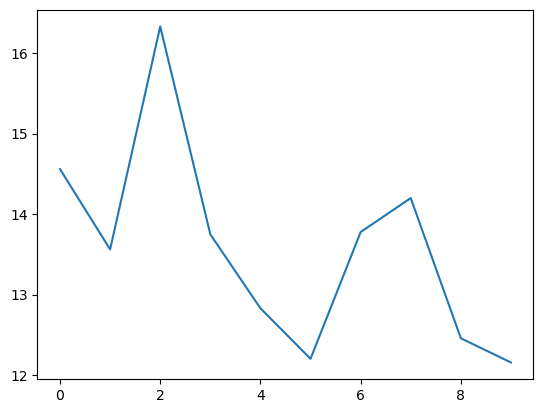

In [76]:
mbics = []

for p in range(10):
    bics = []

    for _ in range(100):
        y_true = f_a(x)
        y_observed = y_true + make_eps()

        beta = fit_polynomial(x, y_observed, p)
        bic = calculate_bic(y_observed, y_pred, 1)
        
        bics.append(bic)

    mbics.append(np.mean(bics))
    
print(mbics)
plt.plot(mbics)

<function matplotlib.pyplot.show(close=None, block=None)>

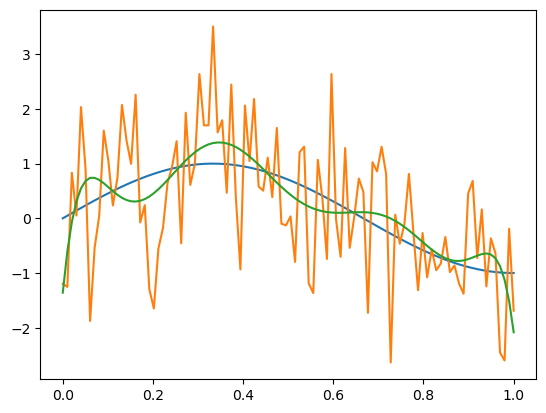

In [71]:
y_pred = np.polyval(beta, x)

plt.plot(x, y_true, label='true')
plt.plot(x, y_observed, label='observed')
plt.plot(x, y_pred, label='pred')
plt.show